In [1]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
from scipy.integrate import quad
import scipy.stats as stats
from scipy.stats import expon
from scipy.stats import norm
import pandas as pd
import sys
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

In [14]:
#Information theory
def information(p):
  if p > 1 or p < 0:
    print ('probability must be between 1 and 0')
    return
  if p == 0:
    return 0
  return np.log(1/p)
#for log base 2
#Kate wins the basketball game.
print( information(0.95))
#Matt wins the basketball game.
print(information(0.0499))
#Alice wins the basketball game.
print(information(0.0001))

0.05129329438755048
2.997734276224664
9.210340371976184


In [19]:
#Entropy
balls = np.array([[0.4],
                  [0.2],
                  [0.2],
                  [0.2]])
def entropy(x):
  result = 0
  for p in x:
    result += (information(p)*p)
  return result
entropy(balls)

array([1.3322])

In [20]:
X = genfromtxt('time_until_phone_drop.csv', delimiter=',')
n = X.shape[0]
μ = mean(X)
θ = 1/μ

In [25]:

def p(x): return θ*np.exp(-θ*x)
def f(x): return -p(x)*np.log(p(x))
def g(x): return -np.log(p(x))

In [26]:
Ĥ, err = quad(f, 0, 50)
print('Entropy by numpy : %.3f'%Ĥ)
print('Entropy by averaging samples : %.3f'%mean(g(X)))

Entropy by numpy : 0.888
Entropy by averaging samples : 0.888


In [46]:
X1 = genfromtxt('age_met_married_female.csv', delimiter=',')
X2 = genfromtxt('age_met_married_males.csv', delimiter=',')
X3 = genfromtxt('age_met_dating_males.csv', delimiter=',')

In [47]:
def p(x, data, σ):
	kde_sum = 0
	for μᵢ in data:
		kde_sum += norm.pdf(x, μᵢ, σ)
	return kde_sum/len(data)

In [34]:
def p1(x): return p(x, X1, 1.6)
def p2(x): return p(x, X2, 1.6)
def p3(x): return p(x, X3, 3)

Text(0.5, 1.0, 'Married females')

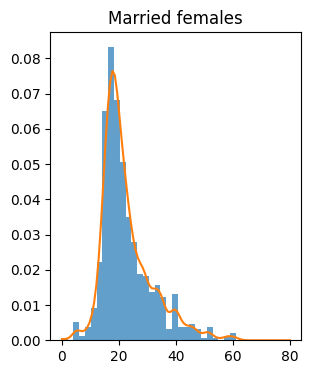

In [36]:
x = np.linspace(0, 80, 100)
plt.figure(figsize=(11,4))
plt.subplot(131)
y = p1(x)
plt.hist(X1, density=True, bins=30, alpha=0.7)
plt.plot(x,y)
plt.title('Married females')

Text(0.5, 1.0, 'Married males')

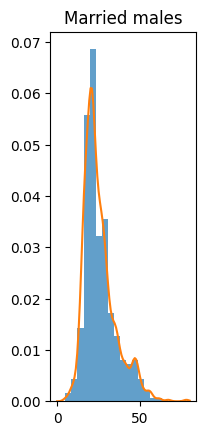

In [38]:
plt.subplot(132)
y = p2(x)
plt.hist(X2, density=True, bins=20, alpha=0.7)
plt.plot(x,y)
plt.title('Married males')

In [54]:
def KL12(x): return p1(x)*np.log(p1(x)/p2(x))
def KL13(x): return p1(x)*np.log(p1(x)/p3(x))

In [ ]:
print( kl_12, err = quad(KL12, 0, 80), '<', kl_13, err = quad(KL13, 0, 80))